<a href="https://colab.research.google.com/github/EnricoHuber/TensorFlow-Review/blob/main/Neural_Networks_with_TF_and_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%tensorflow_version 2.x

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [19]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
train_images[0, 23, 23]   # One pixel

194

In [22]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

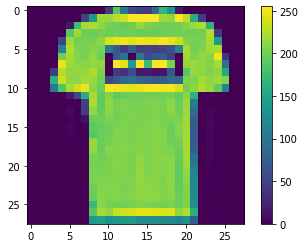

In [24]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
# Squeeze (scale) the data between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [27]:
model

In [28]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6234 - accuracy: 0.7841
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3838 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3382 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2779 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2602 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.9067
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8810
Test accuracy:  0.8809999823570251


In [36]:
predictions = model.predict(test_images)

In [37]:
predictions

array([[2.5213356e-10, 9.4018560e-10, 7.3926505e-09, ..., 1.0153861e-02,
        4.4181685e-09, 9.8590636e-01],
       [3.8851917e-07, 7.5062011e-16, 9.8784268e-01, ..., 4.1486950e-20,
        4.3462350e-13, 4.0562006e-17],
       [2.2222725e-08, 1.0000000e+00, 5.6712330e-12, ..., 4.0137151e-30,
        1.8004226e-13, 5.9420912e-18],
       ...,
       [1.9530264e-04, 1.8943328e-11, 1.7005025e-04, ..., 6.5823354e-12,
        9.9869055e-01, 1.0194774e-13],
       [1.1987057e-08, 9.9998915e-01, 6.5684032e-09, ..., 4.6826462e-20,
        6.1098110e-10, 4.7058906e-12],
       [2.1581021e-05, 2.1852304e-07, 1.7652434e-04, ..., 1.2321792e-03,
        1.9437799e-04, 7.6610622e-06]], dtype=float32)

In [38]:
print(np.argmax(predictions[0]))

9


Prediction: Trouser
Actual: T-shirt/top


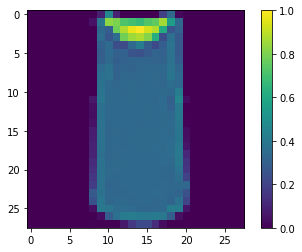

In [48]:
i = 2
print('Prediction:', class_names[np.argmax(predictions[i])])
print('Actual:', class_names[train_labels[i]])
plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show()